In [462]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

# Reading and Previewing Data

In [392]:
billionaires = pd.read_csv('Billionaires Statistics Dataset.csv')
billionaires.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [393]:
billionaires.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

In [394]:
# which one's are we interested in?
interested = ['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'industries', 'countryOfCitizenship',
       'selfMade', 'status', 'gender', 'state',
       'residenceStateRegion', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country']
billionaires = billionaires[interested]

In [395]:
billionaires.shape

(2640, 23)

In [396]:
billionaires.describe()

,rank,finalWorth,age,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country
count,2640.000000,2640.000000,2575.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03
mean,1289.159091,4623.787879,65.140194,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08
std,739.693726,9834.240939,13.258098,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08
min,1.000000,1000.000000,18.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04
25%,659.000000,1500.000000,56.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07
50%,1312.000000,2300.000000,65.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08
75%,1905.000000,4200.000000,75.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09
max,2540.000000,211000.000000,101.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09


In [397]:
income_inequality = pd.read_csv("economic-inequality-gini-index.csv")
income_inequality.head()

,Entity,Code,Year,Gini coefficient
0,Albania,ALB,1996,0.270103
1,Albania,ALB,2002,0.317390
2,Albania,ALB,2005,0.305957
3,Albania,ALB,2008,0.299847
4,Albania,ALB,2012,0.289605


In [398]:
# only preserving the most recent year of Gini index data
income_inequality = income_inequality.sort_values('Year')
income_inequality = income_inequality.groupby('Entity', as_index=False).last()

In [399]:
# because Argentina does not have a whole country GINI index
income_inequality.loc[income_inequality['Entity'] == 'Argentina - urban', 'Entity'] = 'Argentina'
income_inequality.loc[income_inequality['Entity'] == 'Argentina', 'Code'] = 'ARG'

In [400]:
# dropping rows that are not complete countries
income_inequality = income_inequality[~income_inequality['Entity'].str.contains('rural|urban')]

In [401]:
income_inequality.shape

(168, 4)

In [402]:
income_inequality.describe()

,Year,Gini coefficient
count,168.000000,168.000000
mean,2016.125000,0.374058
std,4.632853,0.076865
min,1992.000000,0.232323
25%,2015.000000,0.320521
50%,2018.000000,0.360834
75%,2019.000000,0.418654
max,2021.000000,0.630261


In [403]:
labor_force = pd.read_csv("Labor Force Participation Rate (2022).csv")
labor_force = labor_force.rename(columns={labor_force.columns[-1]: "participation_rate"})
labor_force = labor_force.drop(columns=['Year'])
labor_force.head()

,Economy,Economy Code,participation_rate
0,Aruba,ABW,NaN
1,Afghanistan,AFG,NaN
2,Angola,AGO,74.884
3,Albania,ALB,52.270
4,Andorra,AND,NaN


# Cleaning and Preprocessing

In [404]:
billionaires.isnull().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
industries                                       0
countryOfCitizenship                             0
selfMade                                         0
status                                           0
gender                                           0
state                                         1887
residenceStateRegion                          1893
cpi_country                                    184
cpi_change_country                             184
gdp_country                                    164
gross_tertiary_education_enrollment            182
gross_primary_education_enrollment_country     181
life_expectancy_country        

In [405]:
# filling missing values for country with countryOfCitizenship
billionaires['country'] = billionaires['country'].fillna(billionaires['countryOfCitizenship'])

In [406]:
#Correct data types
#Convert 'gdp_country' to float, remove dollar signs and commas
billionaires['gdp_country'] = billionaires['gdp_country'].replace('[\$,]', '',
                                                                  regex=True).astype(float)

In [407]:
income_inequality.isnull().sum()

Entity              0
Code                0
Year                0
Gini coefficient    0
dtype: int64

In [408]:
labor_force.isnull().sum()

Economy                0
Economy Code           0
participation_rate    34
dtype: int64

In [409]:
# because we are only looking at one variable here, we can drop all rows with any NA values
labor_force.dropna(inplace=True)
income_inequality.rename(columns={'Year': 'Gini_Year'}, inplace=True)
income_labor = pd.merge(income_inequality, labor_force, left_on='Code', right_on='Economy Code', how='outer')

# for countries in the labor dataset but not income inequality, fill in country name with economy name
income_labor.loc[income_labor['Code'].isnull(), 'Entity'] = income_labor.Economy

In [410]:
# Check the countries in 'billionaires' dataframe that are not in 'income_labor' dataframe
not_in_income_labor = billionaires[~billionaires['country'].isin(income_labor['Entity'])]

# Number of such countries
num_not_in_income_labor = not_in_income_labor['country'].nunique()
print("Number of countries that are in 'billionaires' but not in 'income_labor': ", num_not_in_income_labor)

Number of countries that are in 'billionaires' but not in 'income_labor':  12


In [411]:
# Get the countries in 'billionaires' dataframe that are not in 'income_labor' dataframe
not_in_income_labor = billionaires[~billionaires['country'].isin(income_labor['Entity'])]

# Print the unique countries
print("Countries that are in 'billionaires' but not in 'income_labor':\n", not_in_income_labor['country'].unique())

Countries that are in 'billionaires' but not in 'income_labor':
 ['Hong Kong' 'Monaco' 'Czech Republic' 'Eswatini (Swaziland)' 'Bahamas'
 'Cayman Islands' 'Bermuda' 'British Virgin Islands' 'Guernsey'
 'Liechtenstein' 'Turks and Caicos Islands' 'Andorra']


In [412]:
# changing the names of countries in billionaires to match country names in income_labor
british_territories = ['Cayman Islands', 'Bermuda', 'British Virgin Islands', 'Turks and Caicos Islands']

billionaires.loc[billionaires['country']=='Hong Kong', 'country'] = 'Hong Kong SAR, China'
billionaires.loc[billionaires['country']=='Czech Republic', 'country'] = 'Czechia'
billionaires.loc[billionaires['country']=='Eswatini (Swaziland)', 'country'] = 'Eswatini'
billionaires.loc[billionaires['country'].isin(british_territories), 'country'] = 'Virgin Islands (U.S.)'
billionaires.loc[billionaires['country']=='Guernsey', 'country'] = 'Channel Islands'

# showing countries in the billionaires dataset that do not have income inequality nor labor data
not_in_income_labor = billionaires[~billionaires['country'].isin(income_labor['Entity'])]

print("Countries that are in 'billionaires' but not in 'income_labor':\n", not_in_income_labor['country'].unique())

Countries that are in 'billionaires' but not in 'income_labor':
 ['Monaco' 'Bahamas' 'Liechtenstein' 'Andorra']


In [413]:
income_labor = income_labor.drop(columns=['Economy', 'Economy Code'])
final_df = pd.merge(billionaires, income_labor, left_on='country', right_on='Entity', how='left')

In [414]:
# only 21 billionaires are missing both income inequality and labor data
final_df[final_df.Entity.isnull()].shape

(21, 28)

In [415]:
final_df.drop(columns=['Entity', 'countryOfCitizenship'], inplace=True) # might also want to drop code
final_df.rename(columns={'Inequality in income (2021)': 'income_inequality', 'HDI Rank (2021)': 'HDI'}, inplace=True)

In [419]:
final_df.shape

(2640, 26)

# Income Inequality (Gini Coefficient) Overview

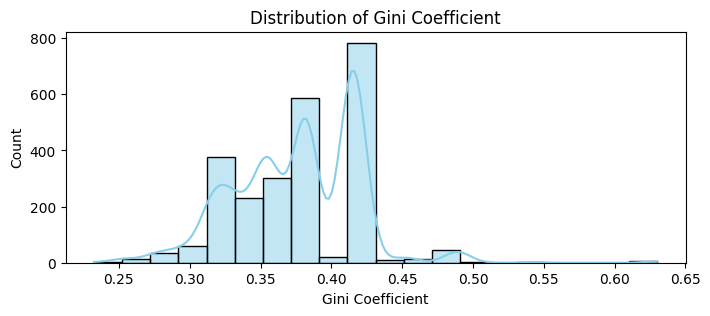

In [439]:
plt.figure(figsize=(8, 3))
sns.histplot(final_df['Gini coefficient'].dropna(), kde=True, color='skyblue', bins=20)
plt.title('Distribution of Gini Coefficient')
plt.xlabel('Gini Coefficient')
plt.ylabel('Count')
plt.show()

In [440]:
final_df['Gini coefficient'].describe()

count    2490.000000
mean        0.375901
std         0.043978
min         0.232323
25%         0.349858
50%         0.381683
75%         0.415356
max         0.630261
Name: Gini coefficient, dtype: float64

# Female Labor Force Participation Rate Overview

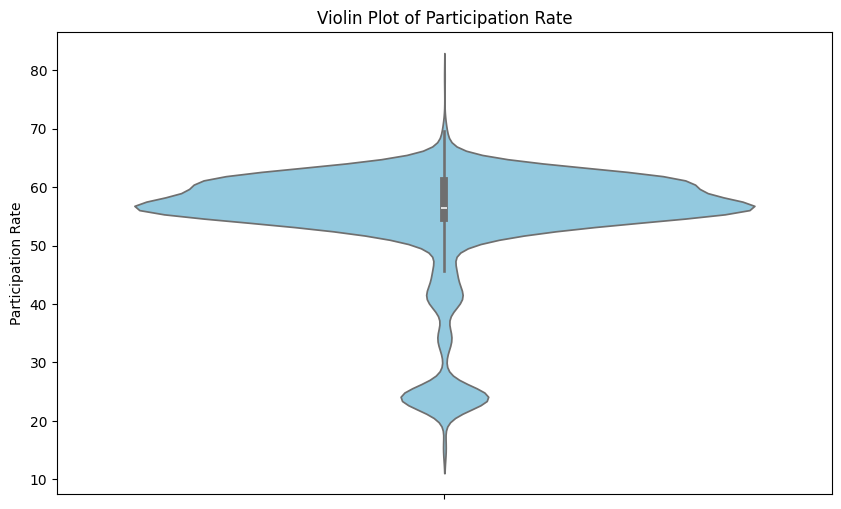

In [441]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=final_df, y='participation_rate', color='skyblue')
plt.title('Violin Plot of Participation Rate')
plt.ylabel('Participation Rate')
plt.show()

In [442]:
final_df['participation_rate'].describe()

count    2488.000000
mean       54.791141
std         9.718543
min        15.123000
25%        54.676500
50%        56.459000
75%        61.067000
max        78.855000
Name: participation_rate, dtype: float64

I. Demographic analysis

1. Age Analysis

count    2575.000000
mean       65.140194
std        13.258098
min        18.000000
25%        56.000000
50%        65.000000
75%        75.000000
max       101.000000
Name: age, dtype: float64


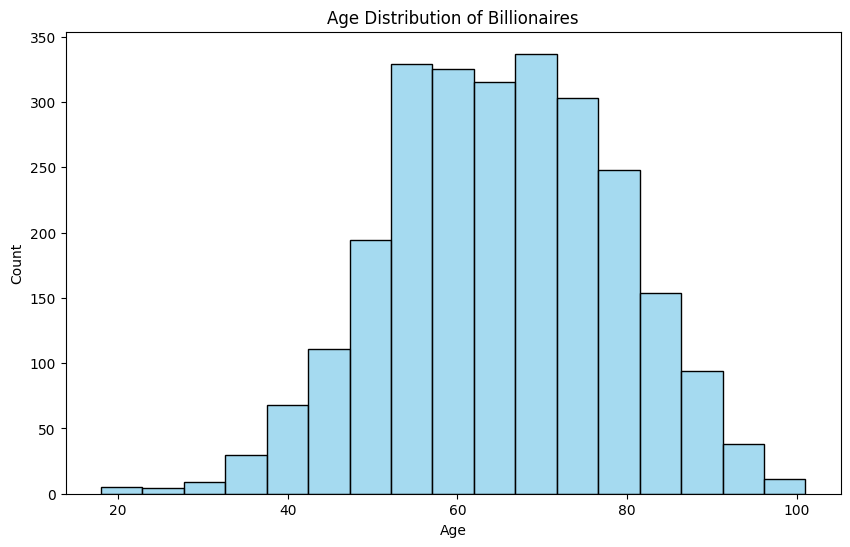

In [420]:
print(final_df['age'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(final_df['age'].dropna(), kde=False, color='skyblue', binwidth=5)
plt.title('Age Distribution of Billionaires')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

2. Gender

gender
M    2303
F     337
Name: count, dtype: int64


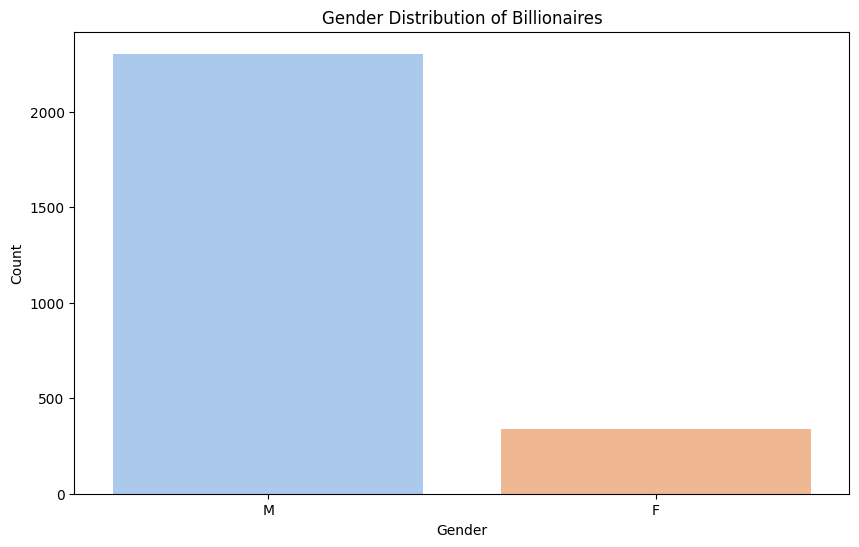

In [421]:
print(final_df['gender'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=final_df, palette='pastel')
plt.title('Gender Distribution of Billionaires')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

3. Industry

industries
Finance & Investments         372
Manufacturing                 324
Technology                    314
Fashion & Retail              266
Food & Beverage               212
Healthcare                    201
Real Estate                   193
Diversified                   187
Energy                        100
Media & Entertainment          91
Metals & Mining                74
Automotive                     73
Service                        53
Construction & Engineering     45
Logistics                      40
Sports                         39
Telecom                        31
Gambling & Casinos             25
Name: count, dtype: int64


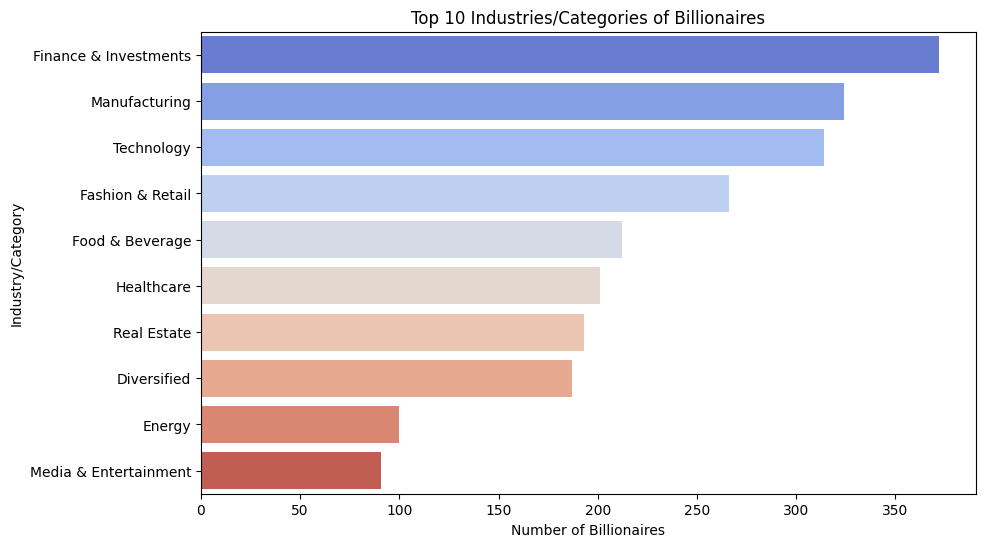

In [422]:
print(final_df['industries'].value_counts())

plt.figure(figsize=(10, 6))
top_categories = billionaires['industries'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='coolwarm')
plt.title('Top 10 Industries/Categories of Billionaires')
plt.xlabel('Number of Billionaires')
plt.ylabel('Industry/Category')
plt.show()

4. Wealth

count      2640.000000
mean       4623.787879
std        9834.240939
min        1000.000000
25%        1500.000000
50%        2300.000000
75%        4200.000000
max      211000.000000
Name: finalWorth, dtype: float64


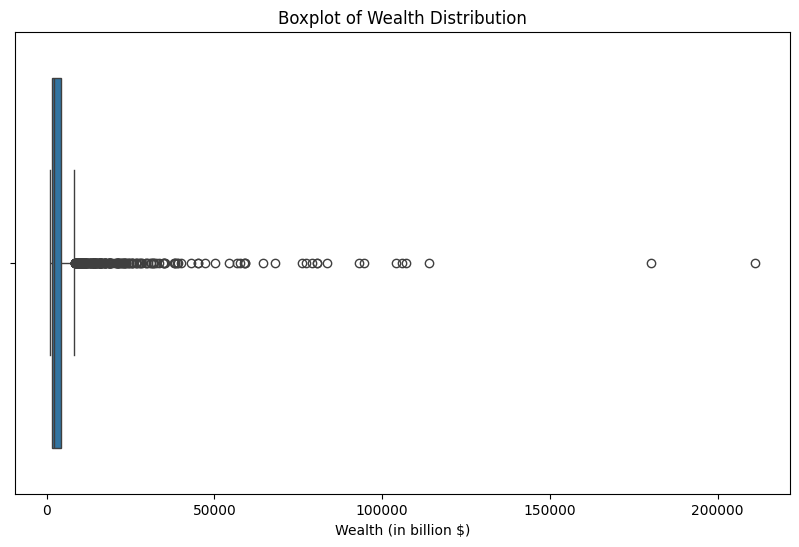

In [423]:
print(final_df['finalWorth'].describe())

plt.figure(figsize=(10, 6))
sns.boxplot(x=final_df['finalWorth'])
plt.title('Boxplot of Wealth Distribution')
plt.xlabel('Wealth (in billion $)')
plt.show()

5. Geographic distribution

country
United States     755
China             523
India             160
Germany           112
United Kingdom     84
                 ... 
Portugal            1
Georgia             1
Colombia            1
Uzbekistan          1
Panama              1
Name: count, Length: 76, dtype: int64


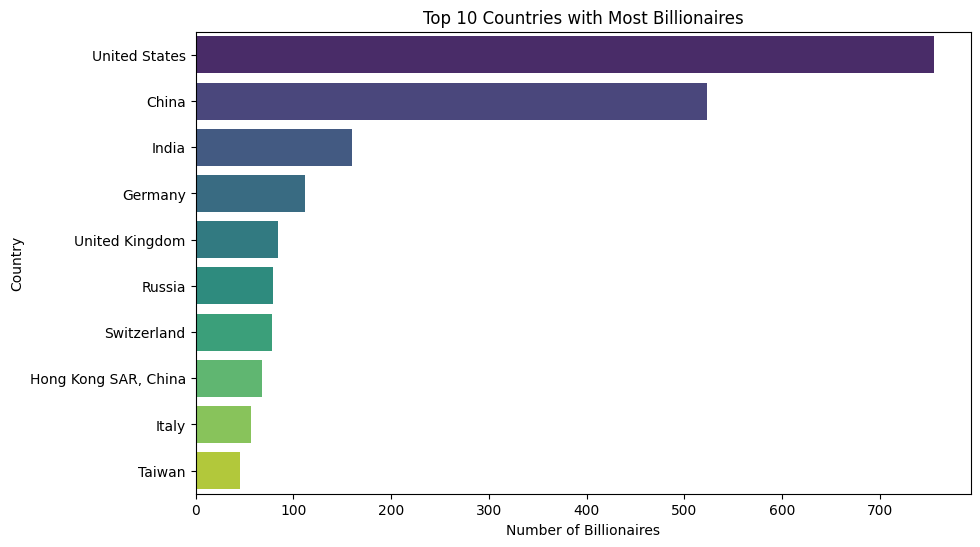

In [424]:
print(final_df['country'].value_counts())

plt.figure(figsize=(10, 6))
top_countries = billionaires['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with Most Billionaires')
plt.xlabel('Number of Billionaires')
plt.ylabel('Country')
plt.show()

II. Economic Indicator

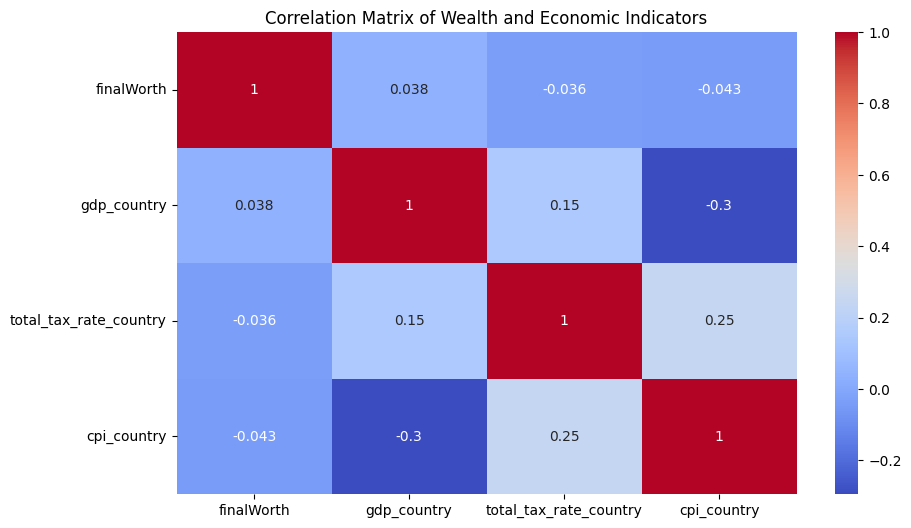

In [425]:
#Explore how finalWorth correlates with various economic indicators like gdp_country and total_tax_rate_country


data = final_df[['finalWorth', 'gdp_country', 'total_tax_rate_country', 'cpi_country']]
corr_matrix = data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Wealth and Economic Indicators')
plt.show()


# @Erin start your economic indicators analysis here

# Wealth Origins and Income Inequality

In [444]:
final_df['Gini coefficient'].describe()

count    2490.000000
mean        0.375901
std         0.043978
min         0.232323
25%         0.349858
50%         0.381683
75%         0.415356
max         0.630261
Name: Gini coefficient, dtype: float64

In [451]:
low_gini = 0.35
high_gini = 0.42

final_df['gini_cat'] = np.select([final_df['Gini coefficient'] < low_gini,
                                  final_df['Gini coefficient'] > high_gini],
                                ['Low', 'High'], default='Medium')
final_df.gini_cat.value_counts()

gini_cat
Medium    1927
Low        633
High        80
Name: count, dtype: int64

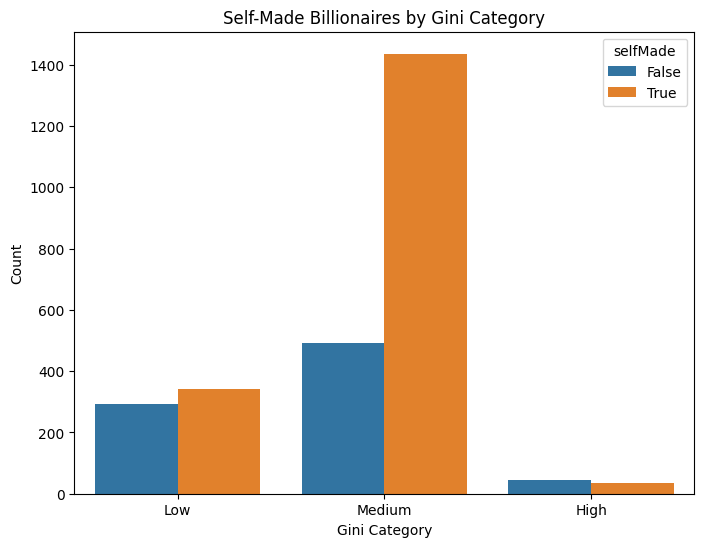

In [457]:
plt.figure(figsize=(8, 6))
sns.countplot(data=final_df, x='gini_cat', hue='selfMade')
plt.title('Self-Made Billionaires by Gini Category')
plt.xlabel('Gini Category')
plt.ylabel('Count')
plt.show()

In [486]:
final_df.groupby('gini_cat')['selfMade'].value_counts(normalize=True)

gini_cat  selfMade
High      False       0.562500
          True        0.437500
Low       True        0.538705
          False       0.461295
Medium    True        0.745200
          False       0.254800
Name: proportion, dtype: float64

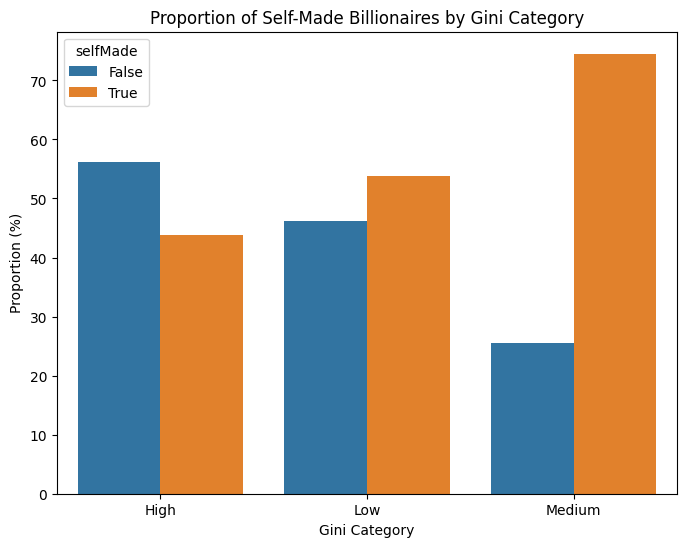

In [489]:
proportion = final_df.groupby('gini_cat')['selfMade'].value_counts(normalize=True).mul(100).rename('Proportion').reset_index()

# Plot the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=proportion, x='gini_cat', y='Proportion', hue='selfMade')
plt.title('Proportion of Self-Made Billionaires by Gini Category')
plt.xlabel('Gini Category')
plt.ylabel('Proportion (%)')

plt.show()


In [464]:
# Create a contingency table
contingency_table = final_df.groupby('gini_cat')['selfMade'].value_counts().unstack()

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)


Chi-square statistic: 118.11641669133873
p-value: 2.2456703470151058e-26


P-value of 2.25e-26 indicates that there is a significant association between the Gini category of the billionaire's home country and the self-made status of billionaires. 

In high inequality countries, here is a higher proportion of billionaires with inherited wealth compared to self-made billionaires. This could be due to the concentration of wealth within a few families or individuals, creating dynasties of inherited wealth. Factors contributing to this could include limited access to resources, educational disparities, and unequal opportunities for wealth creation among different socioeconomic groups. The presence of established and powerful family-owned businesses could also contribute to the higher proportion of inherited wealth among billionaires.

In medium-inequality countries there is a higher proportion of self-made billionaires compared to those with inherited wealth. This could be due to a more level playing field where individuals have better access to education, opportunities, and resources to create wealth on their own merits. Entrepreneurship, innovation, and meritocracy might play more significant roles in wealth creation in these countries. There might be less concentration of wealth within a few families or individuals, leading to a more diverse pool of self-made billionaires.

In some societies with low inequality, there might be less emphasis on entrepreneurship or risk-taking due to a more secure and stable socioeconomic environment. Consequently, fewer individuals might actively pursue creating new businesses or ventures, leading to a higher proportion of wealth passed down through inheritance rather than self-made wealth.

# Gender Differences and Disparities

In [497]:
final_df.gender.value_counts(normalize=True)

gender
M    0.872348
F    0.127652
Name: proportion, dtype: float64

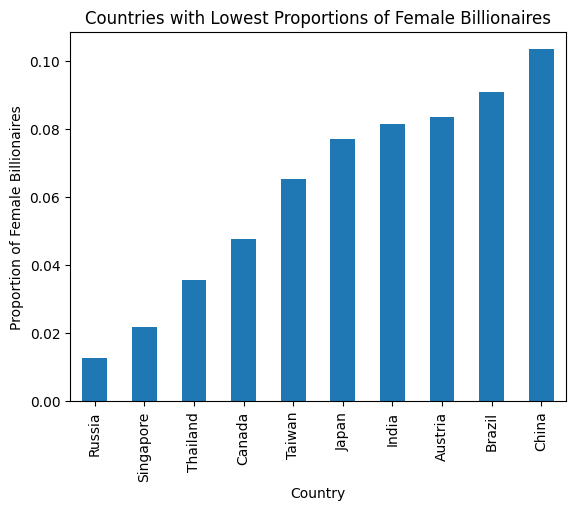

In [514]:
# Grouping data by country and gender, counting the number of billionaires
grouped = final_df.groupby(['country', 'gender']).size().unstack()

# Calculating proportions of Female billionaires for each country
grouped['Total'] = grouped.sum(axis=1)
grouped['Female_Proportion'] = grouped['F'] / grouped['Total']
lowest_female = grouped.sort_values(by='Female_Proportion').head(10)

lowest_female['Female_Proportion'].plot(kind='bar')
plt.title('Countries with Lowest Proportions of Female Billionaires')
plt.xlabel('Country')
plt.ylabel('Proportion of Female Billionaires')
plt.show()

Text(0.5, 0, 'Proportion of Female Billionaires')

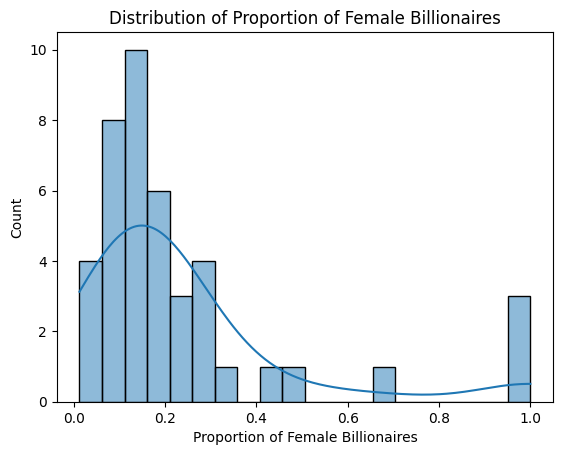

In [512]:
sns.histplot(data=grouped, x='Female_Proportion', kde=True, bins=20)
plt.title('Distribution of Proportion of Female Billionaires')
plt.xlabel('Proportion of Female Billionaires')

In [522]:
labor_force.participation_rate.describe()

count    183.000000
mean      50.938044
std       14.556205
min        6.196000
25%       44.040000
50%       52.920000
75%       60.166000
max       83.726000
Name: participation_rate, dtype: float64

Text(0.5, 1.0, 'Distribution of Female Labor Force Participation Rate')

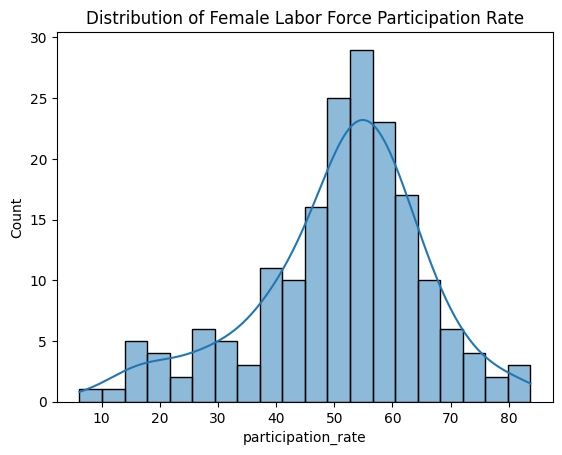

In [524]:
sns.histplot(data=labor_force, x='participation_rate', kde=True, bins=20)
plt.title('Distribution of Female Labor Force Participation Rate')

Text(0.5, 1.0, 'Relationship between proportion of female billionaires and female labor force participation rate')

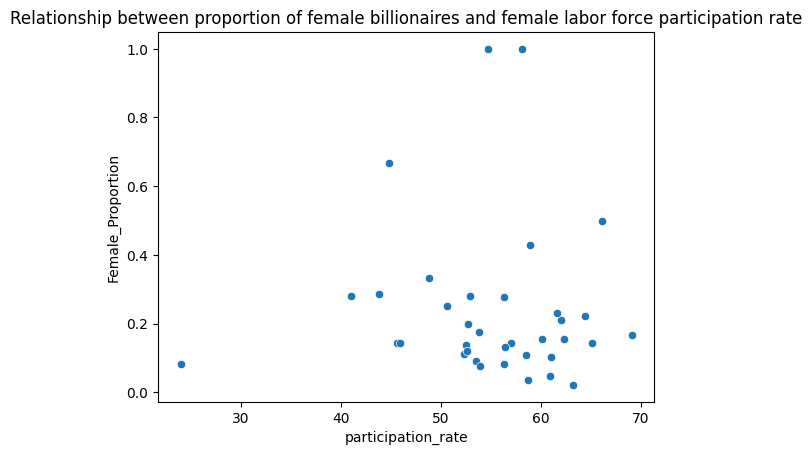

In [521]:
gender_merge = pd.merge(grouped, labor_force[['Economy','participation_rate']], left_on='country', right_on='Economy', how='left')
sns.scatterplot(data=gender_merge, x='participation_rate', y='Female_Proportion')
plt.title('Relationship between proportion of female billionaires and female labor force participation rate')

In [520]:
correlation = gender_merge['participation_rate'].corr(gender_merge['Female_Proportion'])

print(f"Correlation between participation_rate and Female_Proportion: {correlation}")

Correlation between participation_rate and Female_Proportion: -0.017886836159878957


Very low correlation. Rate of female billionaires low everywhere.

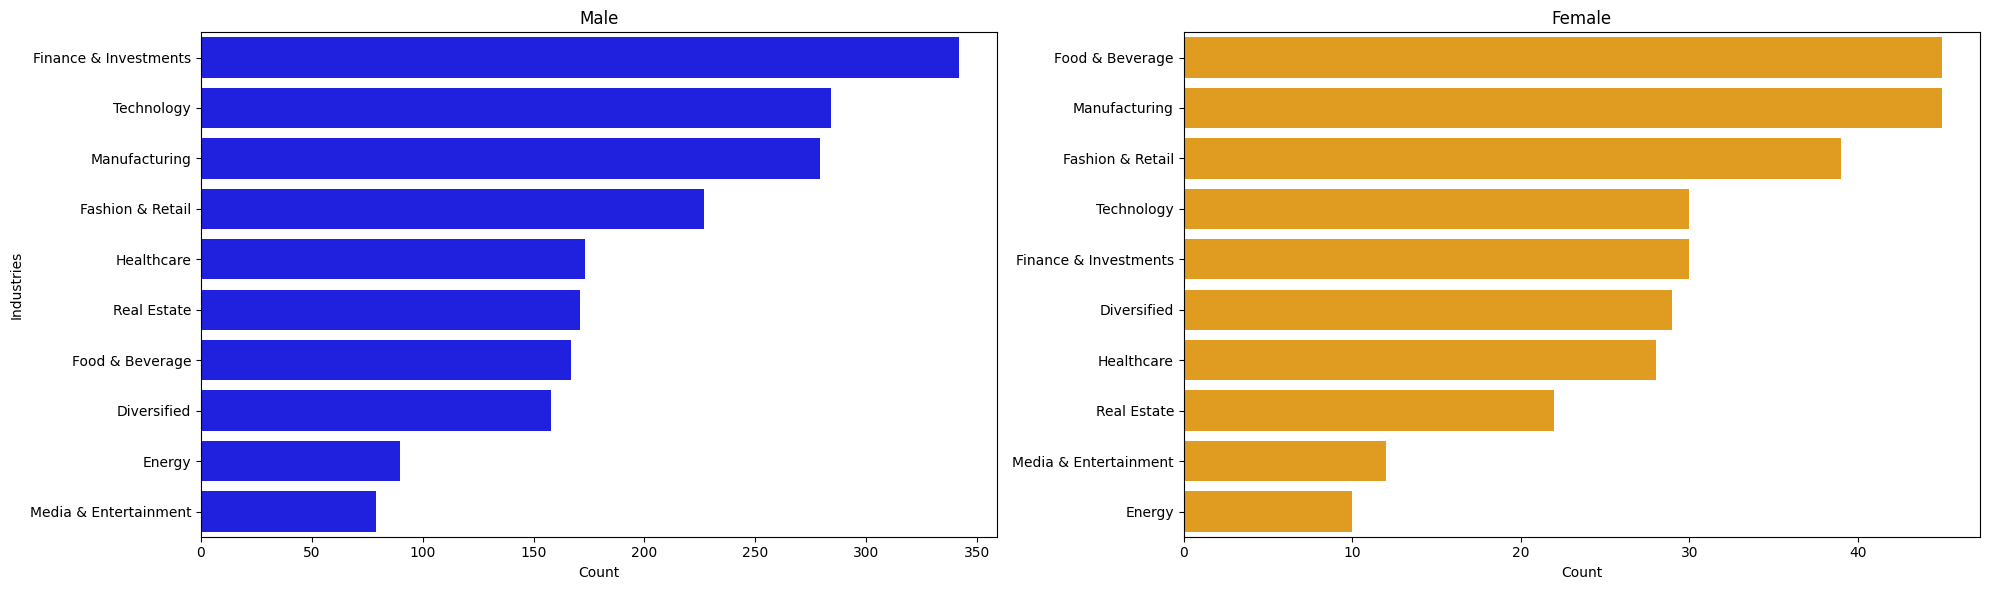

In [ ]:
# Create new dataframe with top industries only
top_industries = final_df['industries'].value_counts().head(10).index.tolist()
filtered_df = final_df[final_df['industries'].isin(top_industries)]

# Separate dataframes for males and females
male_df = filtered_df[filtered_df['gender'] == 'M']
female_df = filtered_df[filtered_df['gender'] == 'F']

# Start plotting
fig, axs = plt.subplots(ncols=2, figsize=(20, 6))

# Find the order to plot
male_order = male_df['industries'].value_counts().index
female_order = female_df['industries'].value_counts().index

# Plot for males
sns.countplot(data=male_df, y='industries', color='blue', ax=axs[0], order=male_order)
axs[0].set_title('Male')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Industries')

# Plot for females
sns.countplot(data=female_df, y='industries', color='orange', ax=axs[1], order=female_order)
axs[1].set_title('Female')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('')

# Show the plot
plt.tight_layout()
plt.show()